# Implementación de una red LSTM sencilla para practicar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Intentamos leer el archivo, tal y como nos viene nos genera errores que debemos solventar con la r y luego especificando el encoding
df = pd.read_csv(r"DatosHistoricos_data.csv", sep = ";", encoding='latin-1')
df.head()

,Máximo,Mínimo,Media,Fecha máximo,Fecha mínimo,Máxima altura,Mínima altura,Media altura,Fecha máximo .1,Fecha mínimo.1,fecha,Máxima pluviometría,Fecha máximo,hrMedia,tmed,velmedia,presMedia
0,585,"483,28",545,01/01/2010 22:30,01/01/2010 0:00,"2,29","2,04","2,19",01/01/2010 22:30,01/01/2010 0:00,01/01/2010 0:00,1,01/01/2010 0:15,57.0,9,"6,7","976,25"
1,585,"532,12",556,02/01/2010 0:00,02/01/2010 21:45,"2,29","2,16","2,22",02/01/2010 0:00,02/01/2010 21:45,02/01/2010 0:00,0,02/01/2010 0:15,71.0,"5,6","2,8","986,35"
2,528,"450,8",498,03/01/2010 0:00,03/01/2010 23:30,"2,15","1,96","2,08",03/01/2010 0:00,03/01/2010 23:30,03/01/2010 0:00,"1,2",03/01/2010 19:15,83.0,"5,6","2,5","986,4"
3,451,386,408,04/01/2010 0:00,04/01/2010 19:00,"1,96","1,8","1,86",04/01/2010 0:00,04/01/2010 19:00,04/01/2010 0:00,"10,8",05/01/2010 0:00,94.0,"6,2","1,7","978,45"
4,418,386,405,05/01/2010 8:15,05/01/2010 0:00,"1,88","1,8","1,85",05/01/2010 8:15,05/01/2010 0:00,05/01/2010 0:00,15,05/01/2010 10:30,80.0,"7,2","6,1","972,9"


In [3]:
df.columns

Index(['Máximo', 'Mínimo            ', 'Media           ',
       'Fecha máximo                    ', 'Fecha mínimo', 'Máxima altura',
       'Mínima altura          ', 'Media altura       ',
       'Fecha máximo                    .1', 'Fecha mínimo.1',
       'fecha         ', 'Máxima pluviometría', 'Fecha máximo      ',
       'hrMedia', 'tmed', 'velmedia', 'presMedia'],
      dtype='object')

In [4]:
df =df.drop(["Máximo",'Mínimo            ','Fecha máximo                    ','Fecha mínimo','Máxima altura','Mínima altura          ','Fecha máximo                    .1','Fecha mínimo.1','Fecha máximo      ',"velmedia"], axis =1)

In [5]:
df

,Media,Media altura,fecha,Máxima pluviometría,hrMedia,tmed,presMedia
0,545,"2,19",01/01/2010 0:00,1,57.0,9,"976,25"
1,556,"2,22",02/01/2010 0:00,0,71.0,"5,6","986,35"
2,498,"2,08",03/01/2010 0:00,"1,2",83.0,"5,6","986,4"
3,408,"1,86",04/01/2010 0:00,"10,8",94.0,"6,2","978,45"
4,405,"1,85",05/01/2010 0:00,15,80.0,"7,2","972,9"
...,...,...,...,...,...,...,...
5191,267,"1,66",19/03/2024 0:00,0,57.0,"18,6","985,05"
5192,256,"1,63",20/03/2024 0:00,"1,8",64.0,"17,8","987,4"
5193,242,"1,59",21/03/2024 0:00,2,65.0,18,"993,5"
5194,228,"1,56",22/03/2024 0:00,"0,2",56.0,19,"989,2"


In [6]:
#modificamos los nombres de las columnas y eliminamos las que no necesitasmos
df.columns = ["Caudal","Altura","Fecha","Pluviometria","Humedad Relativa","Temperatura media","Presion atmosferica media"]

In [7]:
df.dtypes

Caudal                         int64
Altura                        object
Fecha                         object
Pluviometria                  object
Humedad Relativa             float64
Temperatura media             object
Presion atmosferica media     object
dtype: object

In [8]:
#Averiguamos si hay valores nulos en el dataframe
df.isnull().sum()

Caudal                        0
Altura                        0
Fecha                         0
Pluviometria                  0
Humedad Relativa             12
Temperatura media             0
Presion atmosferica media     0
dtype: int64

In [9]:
#Sustituimos ese valor nulo por el de la columna siguiente
df.fillna(inplace = True, method="bfill",limit=1)

C:\Users\cabre\AppData\Local\Temp\ipykernel_7224\3280342582.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(inplace = True, method="bfill",limit=1)


In [10]:
#Convertimos a un formato de datatime la columna fecha
from datetime import datetime
df["Fecha"]= pd.to_datetime(df["Fecha"],dayfirst=True)

In [11]:
df =df.set_index("Fecha", append=False, inplace=False, verify_integrity=False)

In [12]:
#Reemplazamos las comas por puntos en las variables 
df["Altura"] = df["Altura"].apply(lambda x: x.replace(',','.'))
df["Pluviometria"] = df["Pluviometria"].apply(lambda x: x.replace(',','.'))
#df["Humedad Relativa"] = df["Humedad Relativa"].apply(lambda x: x.replace(',','.'))
df["Temperatura media"] = df["Temperatura media"].apply(lambda x: x.replace(',','.'))

df["Presion atmosferica media"] = df["Presion atmosferica media"].apply(lambda x: x.replace(',','.'))
#Modificamos el tipo de caracter de string a float
df["Altura"] = df["Altura"].astype(float)
df["Pluviometria"] = df["Pluviometria"].astype(float)
df["Humedad Relativa"] = df["Humedad Relativa"].astype(float)
df["Temperatura media"] = df["Temperatura media"].astype(float)

df["Presion atmosferica media"] = df["Presion atmosferica media"].astype(float)

In [13]:
#En este caso eliminamos la columna de tiempo

#df.drop(columns =["Fecha"], inplace = True)

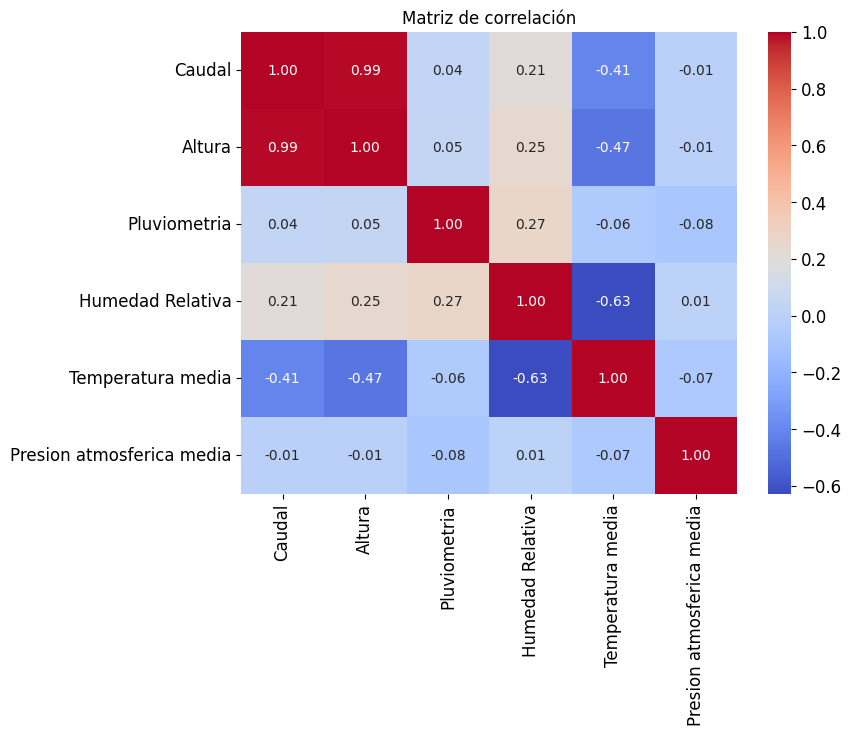

In [14]:

import seaborn as sns
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor (heatmap) usando Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


C:\Users\cabre\AppData\Local\Temp\ipykernel_7224\3372578068.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  plots.indez = df.index[0:N]


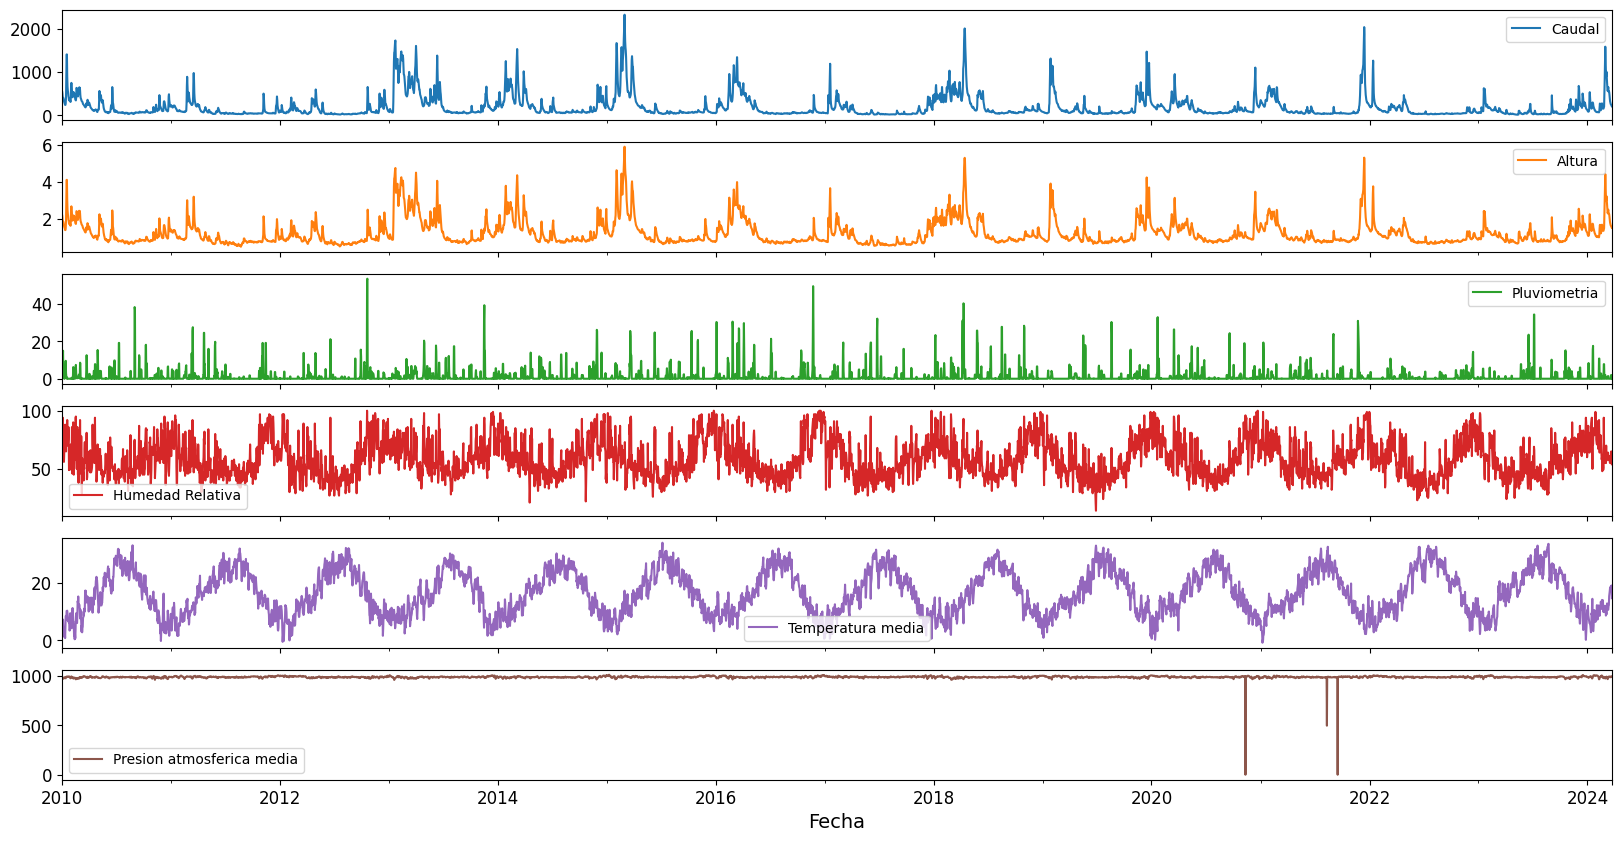

In [15]:
cols = df.columns

N = df.shape[0]
plots = df[cols][0:N]
plots.indez = df.index[0:N]
_=plots.plot(subplots=True, figsize =(20,10))

In [16]:
# Normaliza los datos Caudal
scalerC = MinMaxScaler(feature_range=(0, 1))
caudal = scalerC.fit_transform(df[["Caudal"]])
df["Caudal"] = caudal
# Normaliza los datos Altura
scalerA = MinMaxScaler(feature_range=(0, 1))
altura = scalerA.fit_transform(df[["Altura"]])
df["Altura"] = altura
# Normaliza los datos Pluviometria
scalerP = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerP.fit_transform(df[["Pluviometria"]])
df["Pluviometria"] = pluviometria
# Normaliza los datos Humedad relativa
scalerHr = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerHr.fit_transform(df[["Humedad Relativa"]])
df["Humedad Relativa"] = pluviometria
# Normaliza los datos Temperatura media
scalerT = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerT.fit_transform(df[["Temperatura media"]])
df["Temperatura media"] = pluviometria
# Normaliza los datos Presión atmosferica media 
scalerPA = MinMaxScaler(feature_range=(0, 1))
pluviometria = scalerPA.fit_transform(df[["Presion atmosferica media"]])
df["Presion atmosferica media"] = pluviometria

In [17]:
#Dividimos los datos
def train_val_test_split(dataframe, train_size, valid_size):
    N = dataframe.shape[0]
    N_train = int(train_size*N)
    N_valid = int(valid_size*N)
    N_test = N - N_train - N_valid

    train = dataframe[0:N_train]
    valid = dataframe[N_train:N_train + N_valid]
    test = dataframe[N_train + N_valid:]

    return train, valid, test

In [18]:
trainingSetScaled, validationSetScaled, testSetScaled = train_val_test_split(df,0.8,0.184)

In [19]:
#Tras las particiones, vamos a ver el tamaño de los diferentes set de datos
print(f"Tamaño datos entrenamiento: Train {trainingSetScaled.shape}")
print(f"Tamaño datos entrenamiento: Valid {validationSetScaled.shape}")
print(f"Tamaño datos entrenamiento: Test {testSetScaled.shape}")

Tamaño datos entrenamiento: Train (4156, 6)
Tamaño datos entrenamiento: Valid (956, 6)
Tamaño datos entrenamiento: Test (84, 6)


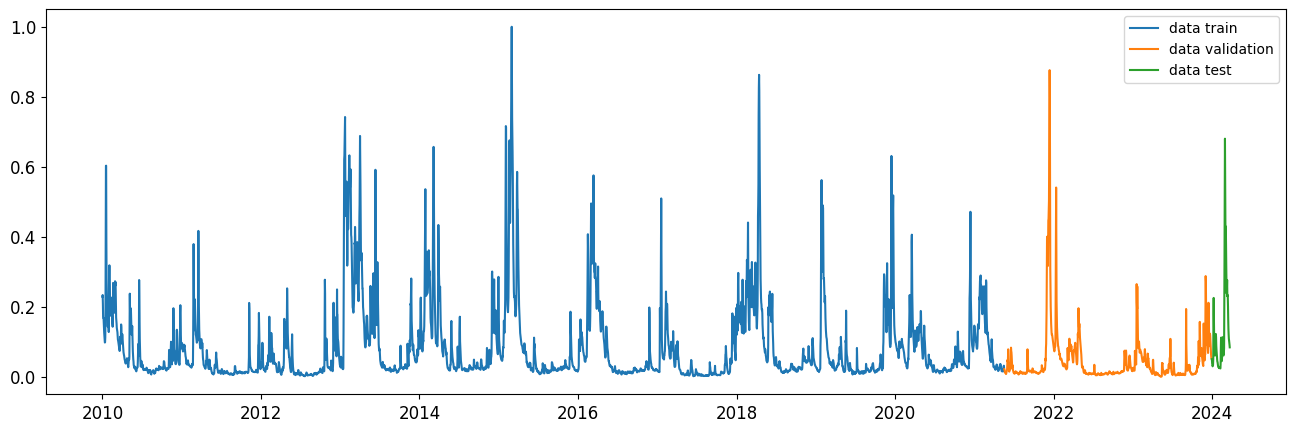

In [20]:
#Dibujamos la división para verificar que se encuentran de manera consecutiva
#Observamos que los parametros de tiempo han sido correctos para la variable objetivo 
fig, ax = plt.subplots(figsize=(16,5))
N = df.shape[0]
ax.plot(trainingSetScaled["Caudal"], label="data train")
ax.plot(validationSetScaled["Caudal"], label="data validation")
ax.plot(testSetScaled["Caudal"], label="data test")
plt.legend();

In [21]:
trainingSet = np.array(trainingSetScaled)
validationSet= np.array(validationSetScaled)
testSet= np.array(testSetScaled)

In [22]:
def crear_dataset_supervisado(array, input_length, output_length):

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+input_length,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,0:1].reshape(output_length,1))
    
    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

In [23]:
#El entrenamiento de nuestra red neuronal recurrente va ser alimentado con bloques de datos
# Nosotros debemos especificar el tamaño de paquetes de datos de entrada y el tamaño de paquetes de salida en cada iteración
INPUT_LENGTH = 30   #Vamos a trabajar con 30 días de datos de entrada
OUTPUT_LENGTH = 1   #Vamos a trabajar con 1 días de datos de salida

X_train, y_train = crear_dataset_supervisado(trainingSet, INPUT_LENGTH, OUTPUT_LENGTH)
X_valid, y_valid  = crear_dataset_supervisado(validationSet, INPUT_LENGTH, OUTPUT_LENGTH)
X_test, y_test = crear_dataset_supervisado(testSet, INPUT_LENGTH, OUTPUT_LENGTH)


In [24]:
#Parametros para la red neurona 
na = 20
output_shape = 1
input_shape =(X_train.shape[1],X_train.shape[2])

In [25]:
input_shape

(30, 6)

# Red SIMPLE RNN

Red SIMPLE RNN que cada 30 días anteriores de entrada, nos predice 1 día

In [26]:
RNN = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences= True, input_shape=input_shape),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(OUTPUT_LENGTH)
])

In [27]:
#Compilación de la red
RNN.compile(loss="mse", optimizer="adamax",metrics=["mae"])
#entrenamiento y validación
historyRNN = RNN.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
129/129 [==============================] - 2s 6ms/step - loss: 0.1001 - mae: 0.1930 - val_loss: 0.0149 - val_mae: 0.0930
Epoch 2/20
129/129 [==============================] - 1s 5ms/step - loss: 0.0184 - mae: 0.0980 - val_loss: 0.0102 - val_mae: 0.0757
Epoch 3/20
129/129 [==============================] - 1s 5ms/step - loss: 0.0143 - mae: 0.0845 - val_loss: 0.0079 - val_mae: 0.0648
Epoch 4/20
129/129 [==============================] - 1s 5ms/step - loss: 0.0118 - mae: 0.0758 - val_loss: 0.0070 - val_mae: 0.0613
Epoch 5/20
129/129 [==============================] - 1s 5ms/step - loss: 0.0099 - mae: 0.0688 - val_loss: 0.0058 - val_mae: 0.0555
Epoch 6/20
129/129 [==============================] - 1s 5ms/step - loss: 0.0084 - mae: 0.0627 - val_loss: 0.0059 - val_mae: 0.0584
Epoch 7/20
129/129 [==============================] - 1s 5ms/step - loss: 0.0072 - mae: 0.0581 - val_loss: 0.0041 - val_mae: 0.0448
Epoch 8/20
129/129 [==============================] - 1s 5ms/step - loss: 0.

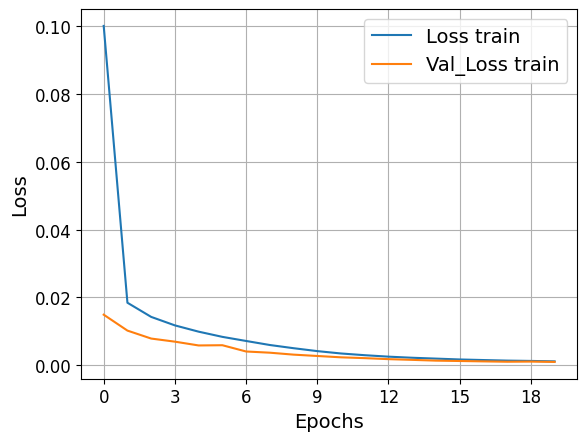

In [28]:
# Graficamos los resultados de modelo 
plt.plot(historyRNN.history["loss"],label="Loss train")
plt.plot(historyRNN.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)      

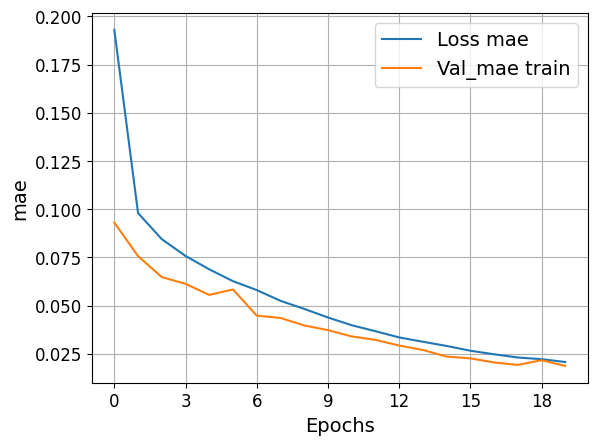

In [29]:
plt.plot(historyRNN.history["mae"],label="Loss mae")
plt.plot(historyRNN.history["val_mae"],label="Val_mae train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("mae")
plt.grid(True)      

In [30]:
realidad = scalerC.inverse_transform(testSetScaled[["Caudal"]])

In [31]:
RNNpred = RNN.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [32]:
RNNpred = scalerC.inverse_transform(RNNpred)

In [33]:
len(realidad)

84

In [34]:
len(RNNpred)

53

In [35]:
RNNpred = RNNpred.reshape(-1)
realidad = realidad.reshape(-1)

In [36]:
len(realidad)

84

In [37]:
realidad = realidad[INPUT_LENGTH-1:-2]

In [38]:
len(realidad)

53

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,mean_absolute_percentage_error


test_mse_RNN = mean_squared_error(realidad, RNNpred)
test_rmse_RNN = np.sqrt(test_mse_RNN)  # RMSE es la raíz cuadrada del MSE
test_mae_RNN = mean_absolute_error(realidad, RNNpred)
test_mape_RNN = mean_absolute_percentage_error(realidad, RNNpred)

print(f"Testing RNN MSE: {test_mse_RNN:.4f}")
print(f"Testing RNN RMSE: {test_rmse_RNN:.4f}")
print(f"Testing RNN MAE: {test_mae_RNN:.4f}")
print(f"Testing RNN MAPE: {test_mape_RNN:.4f}%")  # Multiplicamos por 100 para obtener el porcentaje

Testing RNN MSE: 3309.4881
Testing RNN RMSE: 57.5282
Testing RNN MAE: 36.3006
Testing RNN MAPE: 0.1121%


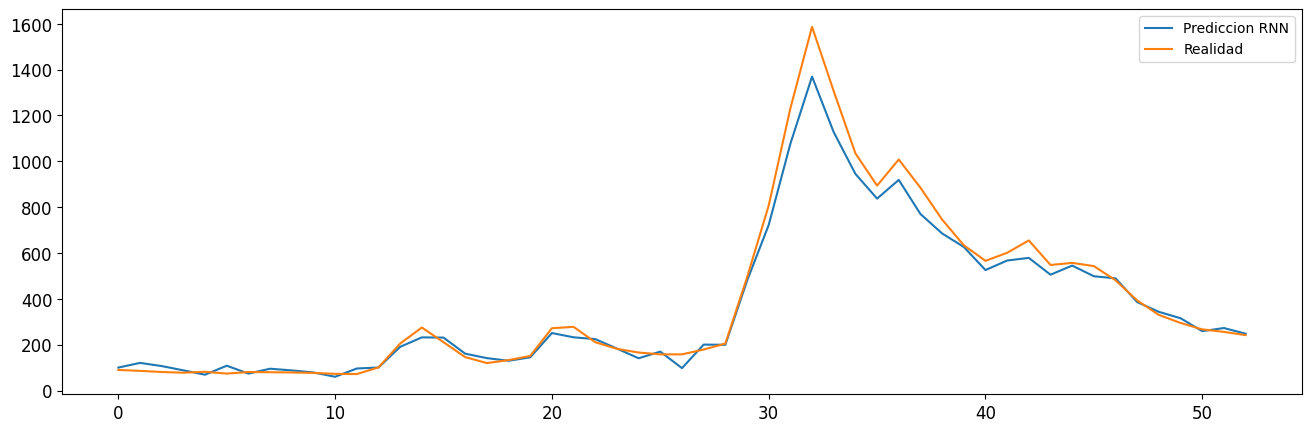

In [40]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(RNNpred, label="Prediccion RNN")
ax.plot(realidad , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Red LSTM

Red LSTM que cada 30 días anteriores de entrada, nos predice 1 día de salida 

In [41]:
LSTM = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=input_shape),
    keras.layers.LSTM(20),
    keras.layers.Dense(OUTPUT_LENGTH)
])

In [42]:
#Compilación de la red
LSTM.compile(loss="mse", optimizer="adamax",metrics=["mae"])
#entrenamiento y validación
historyLSTM = LSTM.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
129/129 [==============================] - 3s 13ms/step - loss: 0.0064 - mae: 0.0465 - val_loss: 0.0042 - val_mae: 0.0472
Epoch 2/20
129/129 [==============================] - 1s 10ms/step - loss: 0.0041 - mae: 0.0356 - val_loss: 0.0030 - val_mae: 0.0312
Epoch 3/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0036 - mae: 0.0324 - val_loss: 0.0026 - val_mae: 0.0291
Epoch 4/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0031 - mae: 0.0303 - val_loss: 0.0022 - val_mae: 0.0230
Epoch 5/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0028 - mae: 0.0286 - val_loss: 0.0022 - val_mae: 0.0272
Epoch 6/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0025 - mae: 0.0268 - val_loss: 0.0020 - val_mae: 0.0247
Epoch 7/20
129/129 [==============================] - 1s 9ms/step - loss: 0.0022 - mae: 0.0255 - val_loss: 0.0019 - val_mae: 0.0257
Epoch 8/20
129/129 [==============================] - 1s 9ms/step - loss: 

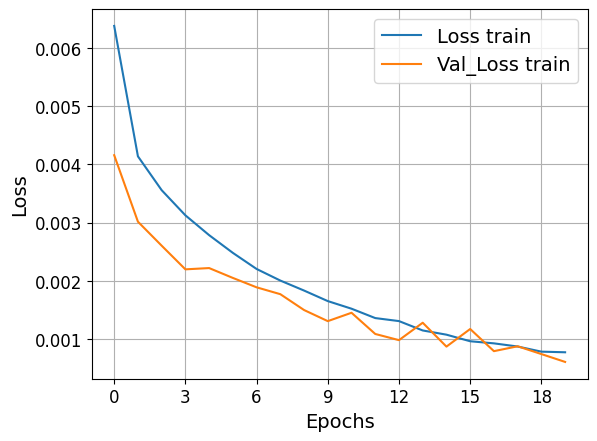

In [43]:
# Graficamos los resultados de modelo 
plt.plot(historyLSTM.history["loss"],label="Loss train")
plt.plot(historyLSTM.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)      

In [44]:
LSTMpred = LSTM.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [45]:
LSTMpred = scalerC.inverse_transform(LSTMpred)

In [46]:
LSTMpred = LSTMpred.reshape(-1)

In [47]:
# Calcular MSE
test_mse_LSTM = mean_squared_error(realidad, LSTMpred)

# Calcular RMSE
test_rmse_LSTM = np.sqrt(test_mse_LSTM)  # RMSE es la raíz cuadrada del MSE

# Calcular MAE
test_mae_LSTM = mean_absolute_error(realidad, LSTMpred)

# Calcular MAPE
test_mape_LSTM = mean_absolute_percentage_error(realidad,LSTMpred)

# Imprimir resultados
print(f"Testing LSTM MSE: {test_mse_LSTM:.4f}")
print(f"Testing LSTM RMSE: {test_rmse_LSTM:.4f}")
print(f"Testing LSTM MAE: {test_mae_LSTM:.4f}")
print(f"Testing LSTM MAPE: {test_mape_LSTM:.4f}%")

Testing LSTM MSE: 4045.8013
Testing LSTM RMSE: 63.6066
Testing LSTM MAE: 43.7971
Testing LSTM MAPE: 0.1717%


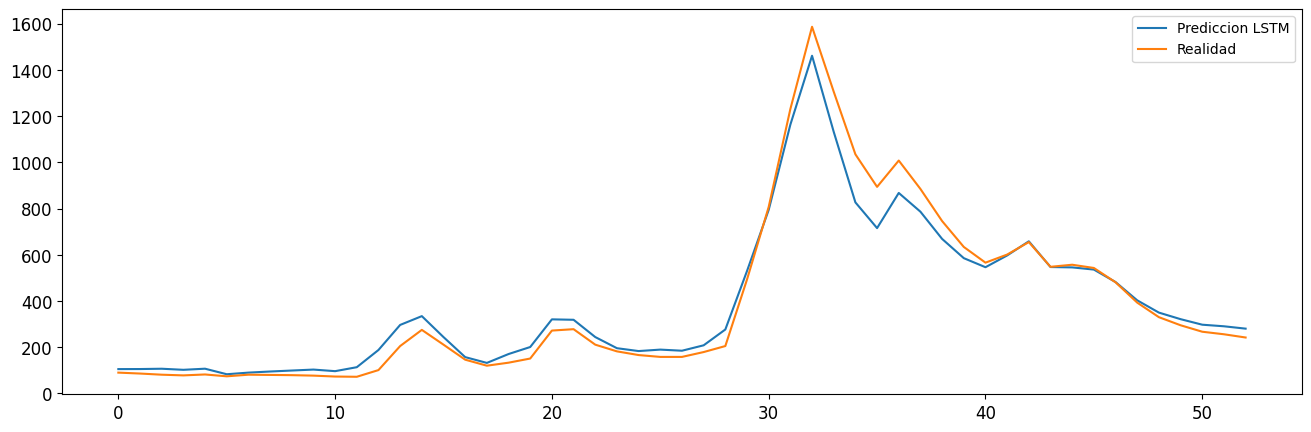

In [48]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(LSTMpred, label="Prediccion LSTM")
ax.plot(realidad , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Red GRU

Red GRU que cada 30 días anteriores de entrada, nos predice 1 día

In [49]:
GRU = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape= input_shape),
    keras.layers.GRU(20),
    keras.layers.Dense(OUTPUT_LENGTH)
])

In [50]:
#Compilación de la red
GRU.compile(loss="mse", optimizer="adamax",metrics=["mae"])
#entrenamiento y validación
historyGRU = GRU.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
129/129 [==============================] - 4s 14ms/step - loss: 0.0102 - mae: 0.0627 - val_loss: 0.0037 - val_mae: 0.0400
Epoch 2/20
129/129 [==============================] - 1s 10ms/step - loss: 0.0038 - mae: 0.0372 - val_loss: 0.0024 - val_mae: 0.0303
Epoch 3/20
129/129 [==============================] - 1s 11ms/step - loss: 0.0027 - mae: 0.0318 - val_loss: 0.0020 - val_mae: 0.0272
Epoch 4/20
129/129 [==============================] - 1s 11ms/step - loss: 0.0023 - mae: 0.0288 - val_loss: 0.0016 - val_mae: 0.0239
Epoch 5/20
129/129 [==============================] - 1s 11ms/step - loss: 0.0019 - mae: 0.0264 - val_loss: 0.0016 - val_mae: 0.0247
Epoch 6/20
129/129 [==============================] - 1s 11ms/step - loss: 0.0017 - mae: 0.0242 - val_loss: 0.0016 - val_mae: 0.0265
Epoch 7/20
129/129 [==============================] - 1s 11ms/step - loss: 0.0015 - mae: 0.0226 - val_loss: 0.0014 - val_mae: 0.0238
Epoch 8/20
129/129 [==============================] - 1s 11ms/step - 

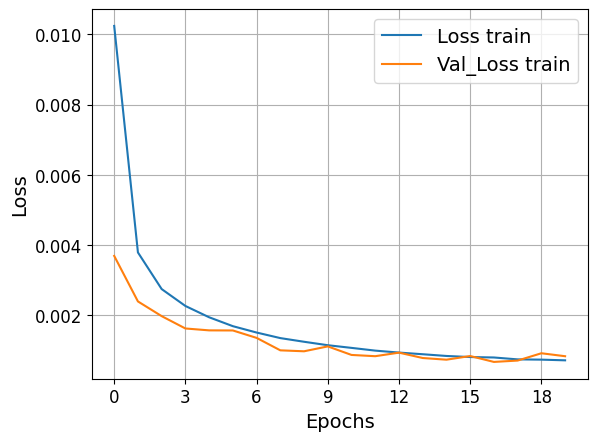

In [51]:
# Graficamos los resultados de modelo 
plt.plot(historyGRU.history["loss"],label="Loss train")
plt.plot(historyGRU.history["val_loss"],label="Val_Loss train")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)   

In [52]:
GRUpred = GRU.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [53]:
GRUpred = scalerC.inverse_transform(GRUpred)

In [54]:
GRUpred = GRUpred.reshape(-1)

In [55]:
# Calcular MSE
test_mse_GRU = mean_squared_error(realidad, GRUpred)

# Calcular RMSE
test_rmse_GRU = np.sqrt(test_mse_GRU)  # RMSE es la raíz cuadrada del MSE

# Calcular MAE
test_mae_GRU = mean_absolute_error(realidad, GRUpred)

# Calcular MAPE
test_mape_GRU = mean_absolute_percentage_error(realidad, GRUpred)

# Imprimir resultados
print(f"Testing GRU MSE: {test_mse_GRU:.4f}")
print(f"Testing GRU RMSE: {test_rmse_GRU:.4f}")
print(f"Testing GRU MAE: {test_mae_GRU:.4f}")
print(f"Testing GRU MAPE: {test_mape_GRU:.4f}%")

Testing GRU MSE: 3704.8261
Testing GRU RMSE: 60.8673
Testing GRU MAE: 53.0605
Testing GRU MAPE: 0.2858%


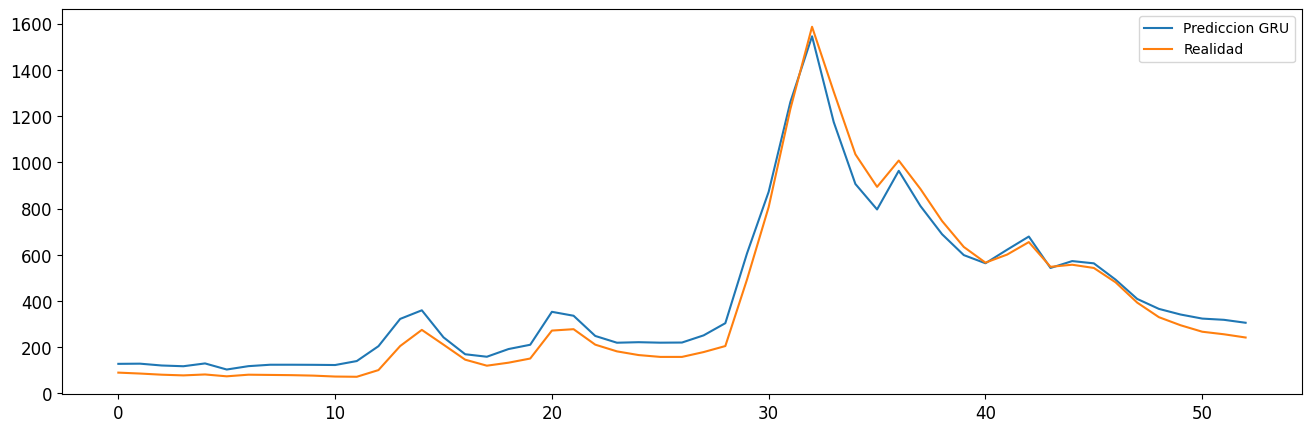

In [56]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(GRUpred, label="Prediccion GRU")
ax.plot(realidad , label="Realidad")# cada 30 días, nos predice 1 salida (0 al 29, empezamos en el día 29)
plt.legend();

# Comparativa final de los modelos RNN, LSTM y GRU

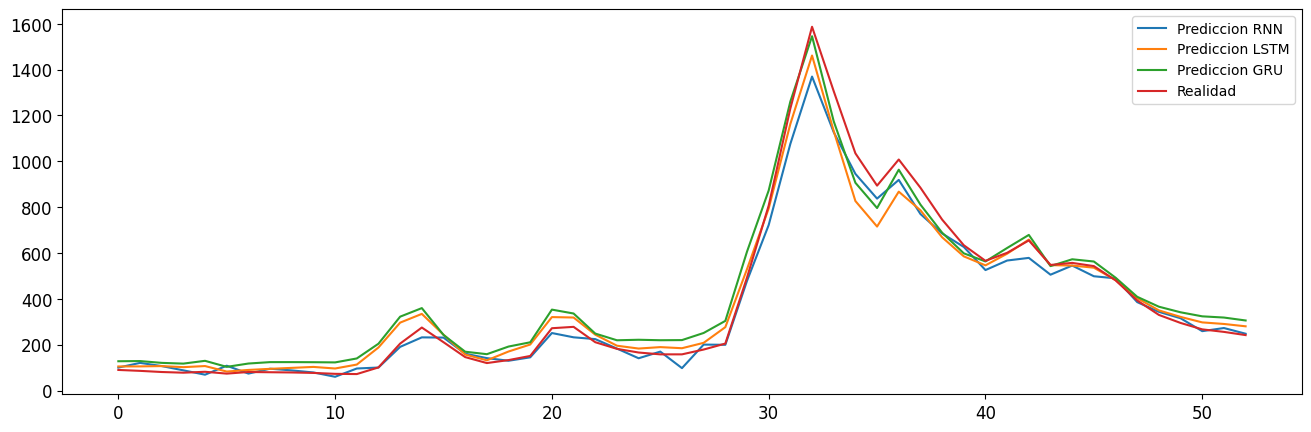

In [57]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(RNNpred, label="Prediccion RNN")
ax.plot(LSTMpred, label="Prediccion LSTM")
ax.plot(GRUpred, label="Prediccion GRU")
ax.plot(realidad , label="Realidad")
plt.legend();